# Champs magnétiques manip Helium LCF
Nous avons implémenté dans le module odt_calc le cluster de bobine : Coils_He1_at_LCF.

In [1]:
# -- global imports
import sys
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
import scipy as sp
import scipy.constants as csts
import skimage
from numpy import pi
from heliumtools.odtcalc.coil import Coils_He1_at_LCF, SingleCoil, CoilSet

## Simple coil (cf l'exemple du module odt-calc)

|B|_max = 27.29 G
|Bx|_max = 16.60 G
|By|_max = 22.98 G
|Bz|_max = 0.00 G


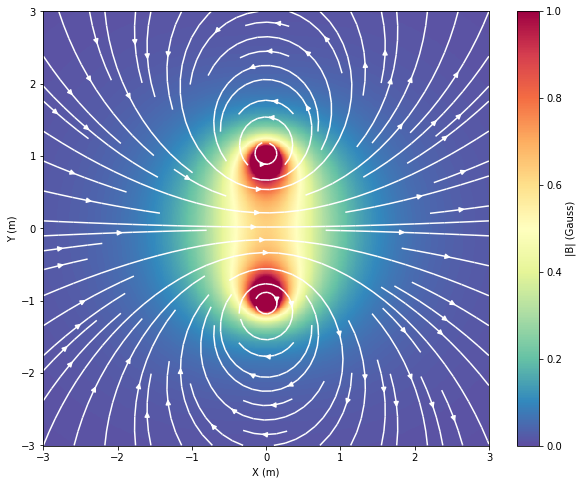

In [2]:
# -- settings
# parameters
radius = 1
axial_shift = 0
plane = 'yz'

# init coil
coil = SingleCoil(plane=plane,
                  current=1,
                  radius=radius,
                  axial_shift=axial_shift,
                  radial_shift=(0,0),
                  n_turns=100)

# -- compute
# grids
x = np.linspace(-3, 3, 500)
y = np.linspace(-3, 3, 500)
x, y = np.meshgrid(x, y)
z = 0

# compute
Bx, By, Bz = coil.field(x, y, z, unit='G')
B = np.sqrt(Bx**2 + Bz**2 + By**2)

# print
print('|B|_max = %.2f G' % np.max(B))
for [ax, Bi] in zip(['x', 'y', 'z'], [Bx, By, Bz]):
    print('|B%s|_max = %.2f G' % (ax, np.max(Bi)))

# plot
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
ax.streamplot(x, y, Bx, By, color='w')
pcm = ax.pcolormesh(x, y, np.sqrt(Bx**2 + Bz**2 + By**2), vmin=0, vmax=1, cmap='Spectral_r')
ax.set_ylabel('Y (m)')
ax.set_xlabel('X (m)')
plt.colorbar(pcm, ax=ax, label='|B| (Gauss)')
plt.show()

## CoilSet (cf exmple de odt-calc)

|B|_max = 90.13 G
|Bx|_max = 80.74 G
|By|_max = 0.00 G
|Bz|_max = 40.07 G


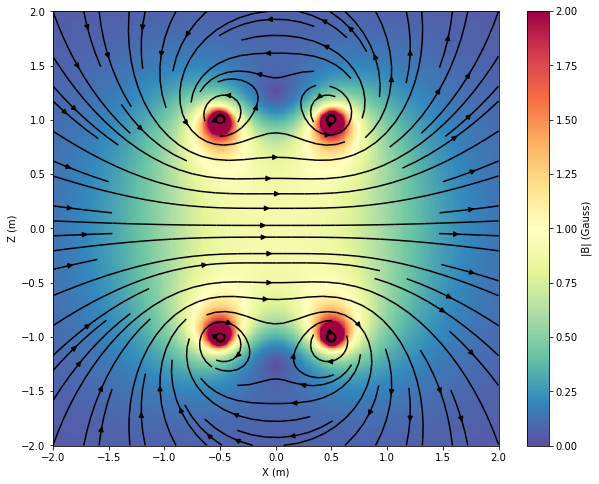

In [3]:
# === Helmholtz
# - settings
radius = 1
plane = 'yz'

# - define coils
coil1 = {'plane': plane,
         'current': 1,
         'radius': radius,
         'axial_shift': -0.5*radius,
         'n_turns': 100
         }

coil2 = {k: v for k, v in coil1.items()}
coil2['axial_shift'] = -coil2['axial_shift']

# - init CoilSet
# it takes a list of dictionnaries
# each dict cointains the settings for one coil
helm_coil = CoilSet([coil1, coil2], label='HC')

# - grids and computation
# grid
x = np.linspace(-2, 2, 500)
z = np.linspace(-2, 2, 500)
y = 0
x, z = np.meshgrid(x, z)

# compute
Bx, By, Bz = helm_coil.field(x, y, z, unit='G')
B = np.sqrt(Bx**2 + Bz**2 + By**2)

# print
print('|B|_max = %.2f G' % np.max(B))
for [ax, Bi] in zip(['x', 'y', 'z'], [Bx, By, Bz]):
    print('|B%s|_max = %.2f G' % (ax, np.max(Bi)))

# plot
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
ax.streamplot(x, z, Bx, Bz, color='k')
pcm = ax.pcolormesh(x, z, np.sqrt(Bx**2 + Bz**2 + By**2), vmin=0, vmax=2, cmap='Spectral_r')
ax.set_ylabel('Z (m)')
ax.set_xlabel('X (m)')
plt.colorbar(pcm, ax=ax, label='|B| (Gauss)')
plt.show()

## MOT

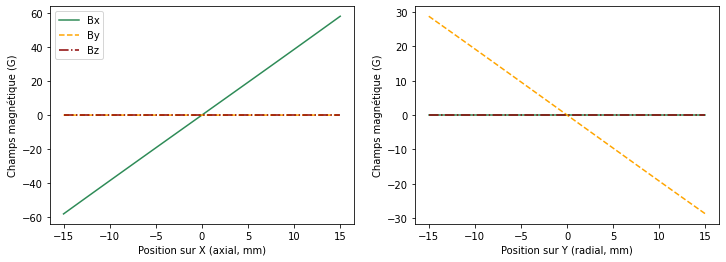

In [4]:
coils = Coils_He1_at_LCF()
coils.set_config("MOT") # on règle la configuration des IGBT
coils.set_i_top(200)
coils.set_i_bottom(0)
cluster = coils.cluster
NX = 100
NY = 101
xmax = 15
xs = np.linspace(-xmax, xmax, NX)
ys = np.linspace(-xmax, xmax, NY)
##Plots 1D
fig, ax = plt.subplots(1,2, figsize=(12,4))
Bx, By, Bz = cluster.field(0.001 * xs, 0, 0, unit="G")
ax[0].plot(xs, Bx, "seagreen", label="Bx", linestyle="-")
ax[0].plot(xs, By, "orange", label="By", linestyle="--")
ax[0].plot(xs, Bz, "darkred", label="Bz", linestyle="-.")
ax[0].legend()
ax[0].set(ylabel="Champs magnétique (G)",xlabel = "Position sur X (axial, mm)")
## Y ##
Bx, By, Bz = cluster.field(0, 0.001 * ys, 0, unit="G")
B = np.sqrt(Bx ** 2 + Bz ** 2 + By ** 2)
ax[1].plot(ys, Bx, "seagreen", label="Bx", linestyle="-")
ax[1].plot(ys, By, "orange", label="By", linestyle="--")
ax[1].plot(ys, Bz, "darkred", label="Bz", linestyle="-.")
ax[1].set(ylabel="Champs magnétique (G)",xlabel = "Position sur Y (radial, mm)")

plt.show()

|B|_max = 64.87 G
|Bx|_max = 58.17 G
|By|_max = -0.00 G
|Bz|_max = 29.42 G


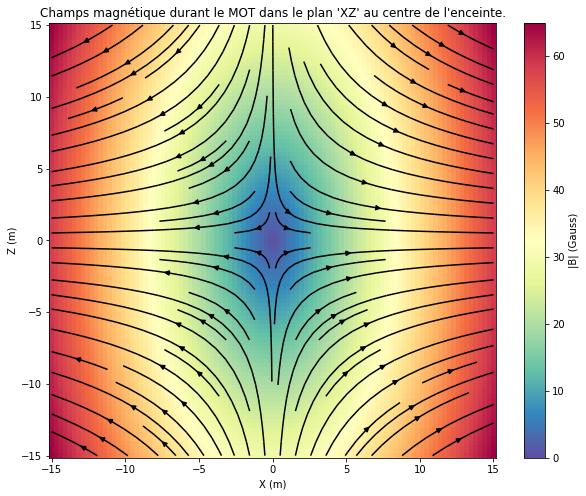

In [5]:
coils = Coils_He1_at_LCF()
coils.set_config("MOT") # on règle la configuration des IGBT
coils.set_i_top(200)
coils.set_i_bottom(0)
cluster = coils.cluster
NX = 100
NY = 101
xmax = 15
xs = np.linspace(-xmax, xmax, NX)
zs = np.linspace(-xmax, xmax, NY)
x, z = np.meshgrid(xs, zs)
Bx, By, Bz = cluster.field(0.001 * x, y, 0.001 * z, unit="G")
B = np.sqrt(Bx ** 2 + Bz ** 2 + By ** 2)

# print
print("|B|_max = %.2f G" % np.max(B))
for [ax, Bi] in zip(["x", "y", "z"], [Bx, By, Bz]):
    print("|B%s|_max = %.2f G" % (ax, np.max(Bi)))

# plot
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
ax.streamplot(x, z, Bx, Bz, color="k")
pcm = ax.pcolormesh(
    x, z, np.sqrt(Bx ** 2 + Bz ** 2 + By ** 2), vmin=0, cmap="Spectral_r"
)
ax.set_ylabel("Z (m)")
ax.set_xlabel("X (m)")
plt.colorbar(pcm, ax=ax, label="|B| (Gauss)")
plt.title("Champs magnétique durant le MOT dans le plan 'XZ' au centre de l'enceinte.")
plt.show()

## Magnetic trap

The Zeeman Hamiltonian in a non-uniform magnetic field **B(r)** is given by
$$
U_{mag} = -\vec{m}\cdot \vec{B}(\vec{r})
$$
If one assumes that the internal states can follow adiabatically the change of **B** as the
atom move in space, hence
$$
\langle F, m_F |U_{mag} |F, m_F \rangle = g_F m_F |\vec{B}(\vec{r})|.
$$
NB : The state $|F, m_F \rangle$ is defined in a local reference frame, where the local quantization axis is given by the direction of **B**.

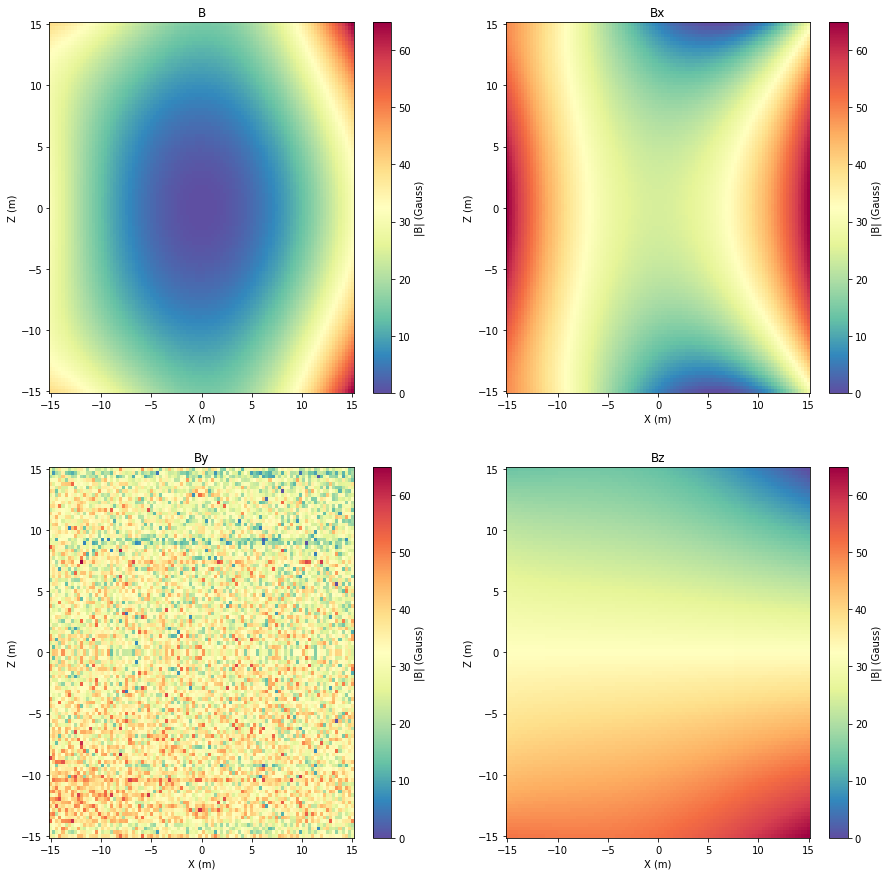

In [6]:
coils = Coils_He1_at_LCF()
coils.set_config("MT") # on règle la configuration des IGBT
coils.set_i_top(0)
coils.set_i_bottom(200)
cluster = coils.cluster
NX = 100
NZ = 100
xmax = 15
xs = np.linspace(-xmax, xmax, NX)
zs = np.linspace(-xmax, xmax, NZ)
x, z = np.meshgrid(xs, zs)
Bx, By, Bz = cluster.field(0.001 * x, y, 0.001 * z, unit="G")
B = np.sqrt(Bx ** 2 + Bz ** 2 + By ** 2)
# plot
fig, ax = plt.subplots(2,2, figsize=(15,15))
Bi = [B, Bx, By, Bz]
label = ["B","Bx","By","Bz"]
for i in range(4):
    ax[i//2,i%2].pcolormesh(x, z, Bi[i],cmap="Spectral_r")
    ax[i//2,i%2].set(title=label[i], ylabel="Z (m)", xlabel ="X (m)")
    plt.colorbar(pcm, ax=ax[i//2,i%2], label="|B| (Gauss)")

### Détermination du biais

On fixe le courant dans l'alim du haut à 198A
On rappelle que 1G = 2.8MHz.


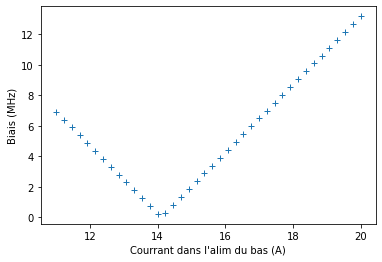

On fixe le courant dans l'alim du bas à 15A


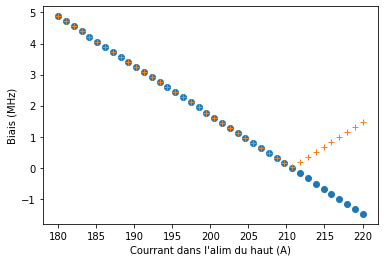

In [7]:
coils = Coils_He1_at_LCF()
coils.set_config("MT") # on règle la configuration des IGBT
coils.set_i_top(198)
coils.set_i_bottom(200)
cluster = coils.cluster
n_points = 40
currents = np.linspace(11, 20, n_points)
B = np.zeros(n_points)
for i in range(n_points):
    coils.set_i_bottom(currents[i])
    Bx, By, Bz = coils.cluster.field(1e-8,1e-8,1e-8, unit="G")
    B[i] = np.sqrt(Bx ** 2 + Bz ** 2 + By ** 2)
print("On fixe le courant dans l'alim du haut à 198A")
plt.plot(currents, 2.8*B, "+")
plt.xlabel("Courrant dans l'alim du bas (A)")
plt.ylabel("Biais (MHz)")
print("On rappelle que 1G = 2.8MHz.")
plt.show()

coils.set_i_bottom(15)
currents = np.linspace(180, 220, n_points)
B = np.zeros(n_points)
Bz_list = np.zeros(n_points)
for i in range(n_points):
    coils.set_i_top(currents[i])
    Bx, By, Bz = coils.cluster.field(1e-8,1e-8,1e-8, unit="G")
    B[i] = np.sqrt(Bx ** 2 + Bz ** 2 + By ** 2)
    Bz_list[i] = Bx
print("On fixe le courant dans l'alim du bas à 15A")
plt.plot(currents, 2.8*Bz_list, "o")
plt.plot(currents, 2.8*B, "+")
plt.xlabel("Courrant dans l'alim du haut (A)")
plt.ylabel("Biais (MHz)")
plt.show()

### Modélisation du piège en fonction des paramètres choisis.
On modélise le piège comme
$$
|B(x, y, z) |= \sqrt{\left[B_0 + 2b_2\left(x^2-\frac{z^2+y^2}{2}\right)\right]^2 + b_1^2(z^2+y^2)}
$$
soit un champs magnétique donné par 
$$
\vec{B}(x,y,z) =  \begin{pmatrix} B_0   \\ 0\\0\end{pmatrix} + b_1\begin{pmatrix} 0 \\ y \\-z \end{pmatrix}  + b_2\begin{pmatrix}x^2 -(y^2+z^2)/2 \\ -b_2xy\\ -b_2xz\end{pmatrix}  
$$
Source :

Sirjean, Olivier. "Collisions ionisantes: un nouveau diagnostic pour les condensats de Bose-Einstein d’hélium métastable." These de Doctorat, Université Paris-Sud (2003).

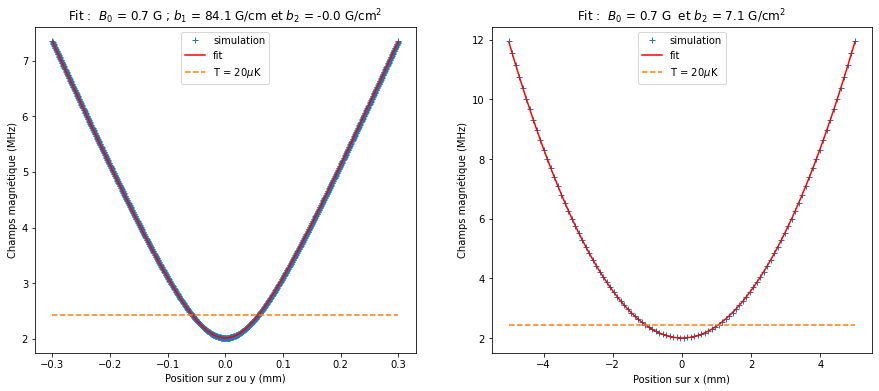

Le biais vaut 2.01 MHz


In [8]:
from scipy.optimize import curve_fit
def func_B_z(z, B0, b1, b2):
    return np.sqrt((B0 -b2*z**2)**2 + b1**2*z**2)
def func_B_x(x, B0, b2):
    return B0 + 2*b2*x**2

import scipy.constants as cst
coils = Coils_He1_at_LCF()
coils.set_config("MT") # on règle la configuration des IGBT
coils.set_i_top(198)
coils.set_i_bottom(15)
cluster = coils.cluster

factor = cst.physical_constants["Bohr magneton"][0]/cst.k*1e6*1e-4#on veut exprimer en microK
factor = 2.8
T = 20 #microK
energy = cst.k * T / cst.h *1e-12 #en MHz


fig, ax = plt.subplots(1,2, figsize=(15,6))
###### CHAMPS SELON UZ #####
NZ = 1000
zmax = .3
z = np.linspace(-zmax,zmax, NZ)
Bx, By, Bz = cluster.field(0, 0, 0.001 * z, unit="G")
z = z/10 #cm
B_uz = np.sqrt(Bx ** 2 + Bz ** 2 + By ** 2)
ax[0].plot(10*z, factor*B_uz, "+" , label= "simulation")
popt, pcov = curve_fit(func_B_z, z, B_uz)
ax[0].set(
    title = "Fit :  $B_0$ = {:.1f} G ; $b_1$ = {:.1f} G/cm et $b_2$ = {:.1f} G/cm$^2$".format(popt[0],popt[1], popt[2]),
    ylabel = "Champs magnétique (MHz)",
    xlabel = "Position sur z ou y (mm)"
)
ax[0].plot(10*z, factor*func_B_z(z, *popt), 'r-', label='fit')
ax[0].plot(10*z, (factor * np.min(B_uz)+energy)*np.ones(z.shape), '--', label='T = {}$\mu$K'.format(T))
ax[0].legend()

###### CHAMPS SELON UX #####
NX = 100
xmax = 5
x = np.linspace(-xmax,xmax, NX)
Bx, By, Bz = cluster.field(0.001 * x, 0,0 , unit="G")
x = x/10 #cm
B_ux = np.sqrt(Bx ** 2 + Bz ** 2 + By ** 2)
popt, pcov = curve_fit(func_B_x, x, B_ux)
ax[1].plot(10*x, factor*B_ux, "+" , label= "simulation")
ax[1].plot(10*x, factor*func_B_x(x, *popt), 'r-', label='fit')
ax[1].plot(10*x, (factor * np.min(B_uz)+energy)*np.ones(x.shape), '--', label='T = {}$\mu$K'.format(T))
ax[1].legend()
ax[1].set(
    title = "Fit :  $ B_0 $ = {:.1f} G  et $b_2$ = {:.1f} G/cm$^2$".format(popt[0],popt[1]),
    ylabel = "Champs magnétique (MHz)",
    xlabel = "Position sur x (mm)"
)
plt.show()
print("Le biais vaut {:.2f} MHz".format(np.min(B_uz)*factor))

## Extinction des alims

On veut éteindre le champs magnétique de façon adiabatique. Il faut pour cela prendre garde à ne pas annuler le biais...
On modélise de la façon suivante :
* à la date $t_{sh}$, les alims sont coupés
* top_sweep_time et bottom_sweep time sont respectivement les temps que prennent les alims pour passer de leur valeur nominal (200, 18) à (0,0).

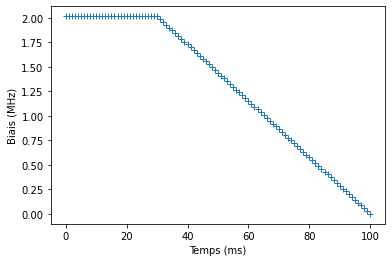

In [32]:
n_points = 101
tsh = 100
sweep_time_top =70
sweep_time_bottom = 70
time = np.linspace(0,100,n_points)
I_bottom_start = 15
I_top_start = 198
I_bottom = [(I_bottom_start if t<tsh-sweep_time_bottom else I_bottom_start*(tsh-t)/(sweep_time_bottom)) for t in range(n_points)]
I_top = [(I_top_start if t<tsh-sweep_time_top else I_top_start*(tsh-t)/(sweep_time_top)) for t in range(n_points)]
Bias = np.zeros(n_points)

for i in range(n_points):
    coils.set_i_top(I_top[i])
    coils.set_i_bottom(I_bottom[i])
    Bx, By, Bz = coils.cluster.field(1e-8,1e-8,1e-8, unit="G")
    Bias[i] = 2.8*Bx
plt.plot(time, Bias, "+")
plt.xlabel("Temps (ms)")
plt.ylabel("Biais (MHz)")
plt.show()